In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import numpy as np

# Load your dataset
data_csv = pd.read_csv('path_to_your_dataset.csv')  # Make sure to replace 'path_to_your_dataset.csv' with the actual path to your dataset

# Define the price threshold for classification
price_column = data_csv.iloc[:, 11]  # "price" variable
price_threshold = price_column.median()
price_category = np.where(price_column >= price_threshold, 1, 0)  # 1 for High Value, 0 for Low Value

features = data_csv[['LOCATION', 'FOOTINGS', 'PIERS', 'LEASE', 'REGION']]

# Split the dataset
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(features, price_category, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_class, y_train_class)

# Predictions
y_pred_class = logistic_model.predict(X_test_class)

# Performance metrics
accuracy = accuracy_score(y_test_class, y_pred_class)
conf_matrix = confusion_matrix(y_test_class, y_pred_class)
class_report = classification_report(y_test_class, y_pred_class)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')


FileNotFoundError: [Errno 2] No such file or directory: 'path_to_your_dataset.csv'

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import numpy as np

# Load your dataset
data_csv = pd.read_csv('puf2022.csv')  # Make sure to replace 'path_to_your_dataset.csv' with the actual path to your dataset

# Define the price threshold for classification
price_column = data_csv.iloc[:, 11]  # "price" variable
price_threshold = price_column.median()
price_category = np.where(price_column >= price_threshold, 1, 0)  # 1 for High Value, 0 for Low Value

features = data_csv[['LOCATION', 'FOOTINGS', 'PIERS', 'LEASE', 'REGION']]

# Split the dataset
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(features, price_category, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_class, y_train_class)

# Predictions
y_pred_class = logistic_model.predict(X_test_class)

# Performance metrics
accuracy = accuracy_score(y_test_class, y_pred_class)
conf_matrix = confusion_matrix(y_test_class, y_pred_class)
class_report = classification_report(y_test_class, y_pred_class)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')


Accuracy: 0.8106761565836299
Confusion Matrix:
[[444 265]
 [  1 695]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.63      0.77       709
           1       0.72      1.00      0.84       696

    accuracy                           0.81      1405
   macro avg       0.86      0.81      0.80      1405
weighted avg       0.86      0.81      0.80      1405



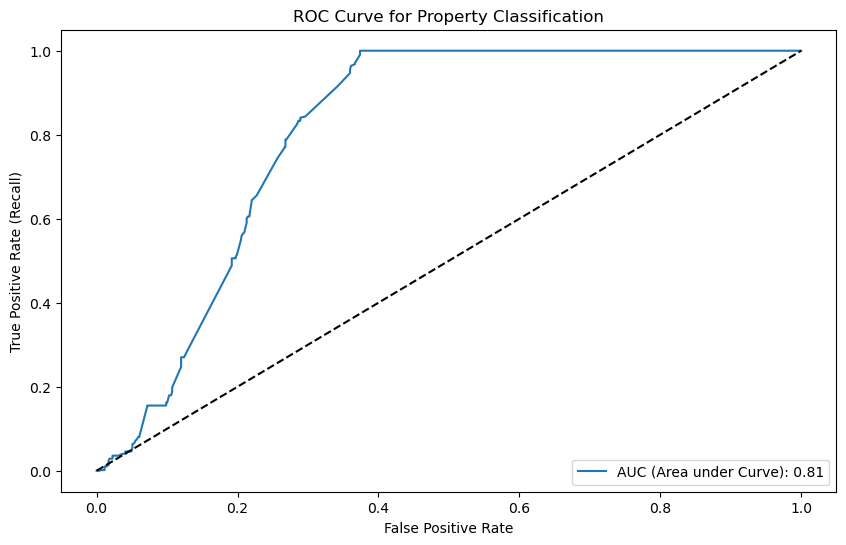

NameError: name 'sns' is not defined

<Figure size 600x400 with 0 Axes>

In [3]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# ROC Curve
y_pred_prob = logistic_model.predict_proba(X_test_class)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_class, y_pred_prob)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC (Area under Curve): {roc_auc_score(y_test_class, y_pred_prob):.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve for Property Classification')
plt.legend(loc='lower right')
plt.show()

# Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()


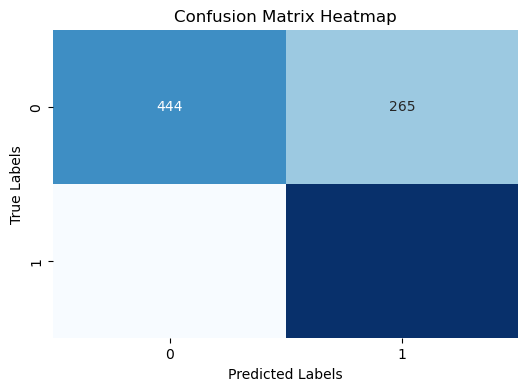

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns  # Ensure Seaborn is imported

# Assuming 'conf_matrix' is defined from the logistic regression model's results
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()


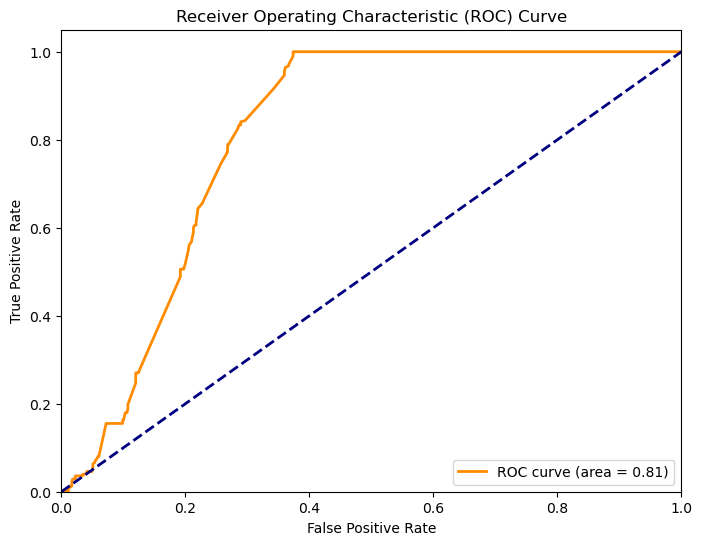

In [5]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming 'y_test_class' contains the actual categories and 'logistic_model' is your trained model
y_pred_prob = logistic_model.predict_proba(X_test_class)[:, 1]  # Get probabilities for the positive class

# Generate ROC curve values: false positives, true positives, and thresholds
fpr, tpr, thresholds = roc_curve(y_test_class, y_pred_prob)

# Calculate the AUC (Area Under the Curve) to quantify model's overall performance
roc_auc = auc(fpr, tpr)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal dashed line for no-skill classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
